
<h1 style=" text-align:center; color:Red; font-size:40px; display: block;"> <u><b><i>Malaria Image Clasification with CNN, ResNet50 and VGG19 🦟🦟</i></b></u> </h1>
<p style="text-align:center; ">
<img src="https://cdn-prod.medicalnewstoday.com/content/images/articles/150/150670/malaria-is-passed-on-by-the-anopheles-mosquito.jpg" style='width: 400px;'>
</p>


# Importing The Modules

In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras.applications import resnet50
from keras.models import *
from keras.layers import *
import keras
import warnings
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3, preprocess_input
warnings.filterwarnings('ignore')



# Reading The File Names

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C203ThinF_IMG_20151029_102123_cell_51.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C238NThinF_IMG_20151207_114038_cell_84.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C119P80ThinF_IMG_20151002_124304_cell_112.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C39P4thinF_original_IMG_20150622_111723_cell_33.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C101P62ThinF_IMG_20150918_151149_cell_63.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C180P141NThinF_IMG_20151201_165601_cell_115.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C95P56ThinF_IMG_20150821_171603_cell_75.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C236ThinF_IMG_20151127_102516_cell_177.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfecte

# Data Preparation

In [3]:
def data_prep(parasitized,uninfected):

    parasitized= ["../input/cell-images-for-detecting-malaria/cell_images/Parasitized" + '/' +  parasitize for parasitize in parasitized]
    uninfected= ["../input/cell-images-for-detecting-malaria/cell_images/Uninfected" + '/' +  uninfect for uninfect in uninfected]

    labels = len(parasitized)*['parasitized'] + len(uninfected)*['uninfected']
    data = parasitized + uninfected

    return pd.DataFrame({'Image_Path': data , 'Labels': labels})


df = data_prep(os.listdir('../input/cell-images-for-detecting-malaria/cell_images/Parasitized/'), os.listdir('../input/cell-images-for-detecting-malaria/cell_images/Uninfected/'))
df.head()

Image_Path       Labels
0  ../input/cell-images-for-detecting-malaria/cel...  parasitized
1  ../input/cell-images-for-detecting-malaria/cel...  parasitized
2  ../input/cell-images-for-detecting-malaria/cel...  parasitized
3  ../input/cell-images-for-detecting-malaria/cel...  parasitized
4  ../input/cell-images-for-detecting-malaria/cel...  parasitized

# Displaying 5 Images For Each Of The Two Labels

Displaying 5 Parasitized Images: 



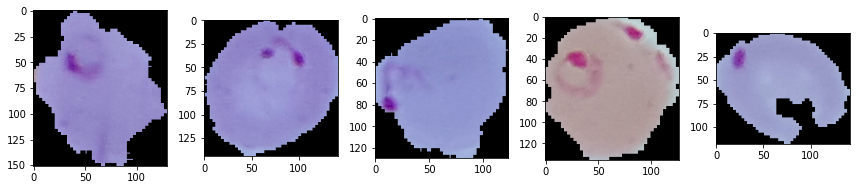


Displaying 5 Uninfected Images: 



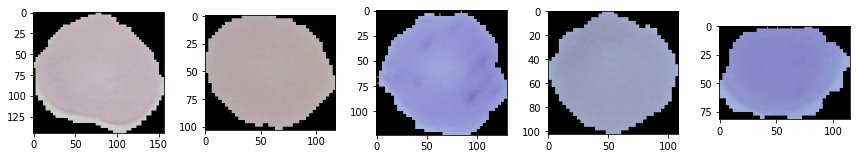

In [4]:

print("Displaying 5 Parasitized Images: ")
print()
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(df[df['Labels'] == 'parasitized']['Image_Path'][i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()


print()
print("Displaying 5 Uninfected Images: ")
print()
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(df[df['Labels'] == 'uninfected']['Image_Path'].reset_index(drop=True)[i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()


# Distribution Of Samples

Text(0.5, 1.0, 'Distribution of samples according to the categories')

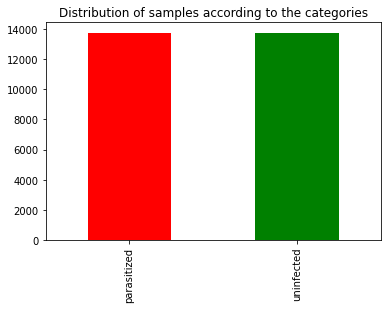

In [5]:
df['Labels'].value_counts().plot(kind = 'bar', color = ['red', 'green'])
plt.title('Distribution of samples according to the categories')

# Augmenting The Data

In [6]:

train, test = train_test_split(df, test_size = .20)

img_datagen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest', validation_split=0.2)
                               
                               
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [7]:
def plot_loss_and_accuracy(mo_fit):
    accuracy = mo_fit.history['accuracy']
    loss = mo_fit.history['loss']
    validation_loss = mo_fit.history['val_loss']
    validation_accuracy = mo_fit.history['val_accuracy']



    plt.figure(figsize=(15, 7))
    plt.subplot(2, 2, 1)
    plt.plot(range(len(accuracy)), accuracy, label='Training Accuracy')
    plt.plot(range(len(accuracy)), validation_accuracy, label='Validation Accuracy')
    plt.legend(loc='upper left')
    plt.title('Accuracy : Training Vs Validation ')



    plt.subplot(2, 2, 2)
    plt.plot(range(len(accuracy)), loss, label='Training Loss')
    plt.plot(range(len(accuracy)), validation_loss, label='Validation Loss')
    plt.title('Loss : Training Vs Validation ')
    plt.legend(loc='upper right')
    plt.show()


# Building CNN

Found 17637 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
Epoch 1/4
100/100 [==============================] - 25s 246ms/step - loss: 4.0882 - accuracy: 0.4911 - val_loss: 0.6940 - val_accuracy: 0.5030
Epoch 2/4
100/100 [==============================] - 21s 214ms/step - loss: 0.7056 - accuracy: 0.4729 - val_loss: 0.6905 - val_accuracy: 0.4980
Epoch 3/4
100/100 [==============================] - 21s 213ms/step - loss: 0.6935 - accuracy: 0.5019 - val_loss: 0.6924 - val_accuracy: 0.5470
Epoch 4/4
100/100 [==============================] - 21s 209ms/step - loss: 0.6929 - accuracy: 0.5001 - val_loss: 0.6871 - val_accuracy: 0.5930


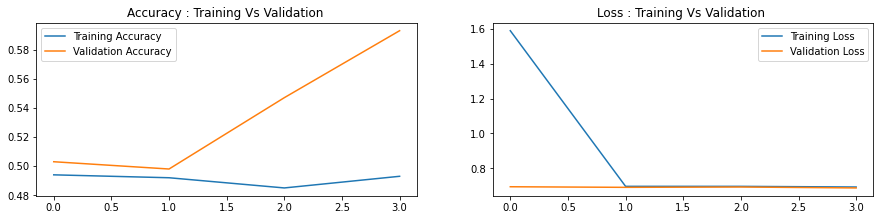

In [17]:
def cnn_model(df, train, test, my_callbacks):
    
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(134,134), shuffle=False, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(134,134), shuffle=False, batch_size=10, seed=10, subset='validation')
    
    model = tf.keras.Sequential(
        [
          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=64, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dropout(rate=0.5),
          tf.keras.layers.Dense(1, activation='sigmoid')
  ])
    model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

    model_history = model.fit_generator(generator = x_train, 
                   steps_per_epoch = 100,
                   epochs = 4 ,
                   validation_data = x_test,
                   validation_steps = 100, callbacks=my_callbacks)
    
    return model_history

    
plot_loss_and_accuracy(cnn_model(df, train, test, my_callbacks))


# Building ResNet50

Found 17637 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
Epoch 1/4
100/100 [==============================] - 104s 919ms/step - loss: 0.6356 - accuracy: 0.7606 - val_loss: 2.0572 - val_accuracy: 0.7630
Epoch 2/4
100/100 [==============================] - 92s 921ms/step - loss: 0.5355 - accuracy: 0.8311 - val_loss: 0.6899 - val_accuracy: 0.9190
Epoch 3/4
100/100 [==============================] - 93s 912ms/step - loss: 0.3426 - accuracy: 0.8986 - val_loss: 5.0753 - val_accuracy: 0.7490
Epoch 4/4
100/100 [==============================] - 90s 899ms/step - loss: 0.3542 - accuracy: 0.8923 - val_loss: 0.6289 - val_accuracy: 0.9430


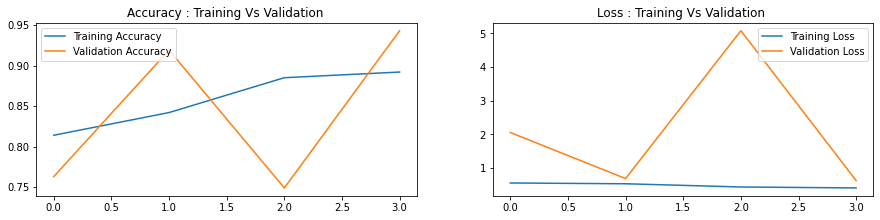

In [14]:
def resnet_model(df, train, test, my_callbacks):
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(64,64), shuffle=False, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(64,64), shuffle=False, batch_size=10, seed=10, subset='validation')
    
    resnet_model=resnet50.ResNet50(weights='imagenet',include_top=False,input_shape=(64,64,3))
    model=Sequential()
    model.add(resnet_model)
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['accuracy'])
    
    
    model_history = model.fit(
    x_train,
    steps_per_epoch=100,
    validation_data=x_test,
    validation_steps=100,
    epochs = 4, callbacks=my_callbacks)
    
    
    return model_history
    
plot_loss_and_accuracy(resnet_model(df, train, test, my_callbacks))

# Building VGG 19

Found 17637 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
Epoch 1/4
100/100 [==============================] - 1384s 14s/step - loss: 2.7363 - accuracy: 0.5449 - val_loss: 0.2296 - val_accuracy: 0.9310
Epoch 2/4
100/100 [==============================] - 1368s 14s/step - loss: 0.4413 - accuracy: 0.8502 - val_loss: 0.1842 - val_accuracy: 0.9420
Epoch 3/4
100/100 [==============================] - 1377s 14s/step - loss: 0.2811 - accuracy: 0.9166 - val_loss: 0.2660 - val_accuracy: 0.8950
Epoch 4/4
100/100 [==============================] - 1373s 14s/step - loss: 0.2832 - accuracy: 0.9233 - val_loss: 0.1580 - val_accuracy: 0.9480


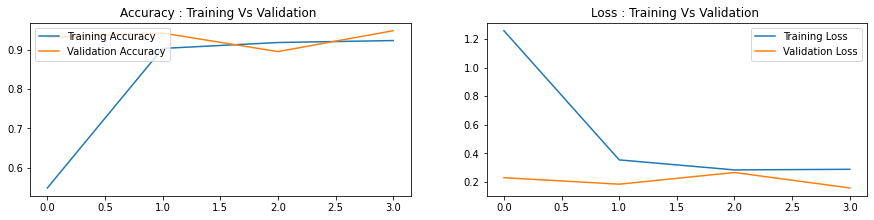

In [15]:
def vgg19_model(df, train, test, my_callbacks):
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(224,224), shuffle=False, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(224,224), shuffle=False, batch_size=10, seed=10, subset='validation')
    
    vgg19_model = VGG19(input_shape=(224,224,3), weights='imagenet',include_top=False)
    model=Sequential()
    model.add(vgg19_model)
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['accuracy'])
    
    model_history = model.fit(
    x_train,
    steps_per_epoch=100,
    validation_data=x_test,
    validation_steps=100, 
    epochs = 4 , callbacks=my_callbacks)
    
    return model_history
    
plot_loss_and_accuracy(vgg19_model(df, train, test, my_callbacks))

# Building InceptionV3

Found 17637 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
Epoch 1/4
100/100 [==============================] - 2363s 24s/step - loss: 1.6749 - accuracy: 0.5481 - val_loss: 0.6948 - val_accuracy: 0.4930
Epoch 2/4
100/100 [==============================] - 2372s 24s/step - loss: 0.7275 - accuracy: 0.4914 - val_loss: 0.6936 - val_accuracy: 0.4960
Epoch 3/4
100/100 [==============================] - 2366s 24s/step - loss: 0.6930 - accuracy: 0.5037 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 4/4
100/100 [==============================] - 2371s 24s/step - loss: 0.6928 - accuracy: 0.5295 - val_loss: 0.6932 - val_accuracy: 0.4960


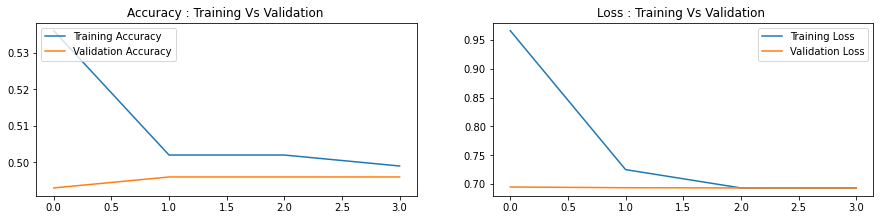

In [18]:
def inception_v3_model(df, train, test, my_callbacks):
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(299, 299), shuffle=False, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(299, 299), shuffle=False, batch_size=10, seed=10, subset='validation')
    
    vgg19_model = VGG19(input_shape=(299, 299,3), weights='imagenet',include_top=False)
    model=Sequential()
    model.add(vgg19_model)
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['accuracy'])
    
    model_history = model.fit(
    x_train,
    steps_per_epoch=100,
    validation_data=x_test,
    validation_steps=100, 
    epochs = 4 , callbacks=my_callbacks)
    
    return model_history
    
plot_loss_and_accuracy(inception_v3_model(df, train, test, my_callbacks))


# Conclusion

> **It can be seen VGG19 is performing the best in all the 4 models worked on here.**

> **InceptionV3 is performing the worst whereas the other two models are performing almost the same.**